<a href="https://colab.research.google.com/github/lucaszm7/CNC_Aprox_SELAs_Interpol_IntegDiff/blob/main/Lucas_Morais_Relatorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**


In [ ]:
#Bibliotecas Aqui!
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *

### Função auxiliar para o plot das funções

In [ ]:
def plota_3d_all(inicio, fim, n_ptos, f, projection_type=["surface", "contour", "wireframe", "surface_cmap"], view_point=None, color=['green', 'blue'], cmap=['viridis', 'inferno'], wireframe=['black', 'grey'],title='Questão XXX', linewidth=1):
  plota_3d(inicio, fim, n_ptos, f, projection_type[2], view_point, color, cmap, wireframe, title, linewidth)
  plota_3d(inicio, fim, n_ptos, f, projection_type[3], view_point, color, cmap, wireframe, title, linewidth)
  plota_3d(inicio, fim, n_ptos, f, projection_type[0], view_point, color, cmap, wireframe, title, linewidth)
  plota_3d(inicio, fim, n_ptos, f, projection_type[1], view_point, color, cmap, wireframe, title, linewidth)

In [ ]:
def plota_3d(inicio, fim, n_ptos, f, projection_type, view_point=None, color=['green', 'blue'], cmap=['viridis', 'inferno'], wireframe=['black', 'grey'],title='Questão XXX', linewidth=1):

  x = np.linspace(inicio, fim, n_ptos)
  y = np.linspace(inicio, fim, n_ptos)

  X, Y = np.meshgrid(x, y)
  Z = []

  for func in f:
    Z.append(func(X, Y))
    
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  if projection_type.lower() == "surface":
    for Z_ax, color_ax in zip(Z, color):
      ax.plot_surface(X, Y, Z_ax, rstride=1, cstride=1, color=color_ax)

  elif projection_type.lower() == "contour":
    for Z_ax, color_ax in zip(Z, color):
      ax.contour3D(X, Y, Z_ax, 50, cmap='binary')

  elif projection_type.lower() == "wireframe":
    for Z_ax, wire_ax in zip(Z, wireframe):
      ax.plot_wireframe(X, Y, Z_ax, color=wire_ax, rstride=3, cstride=3)

  else: # surface cmap
    for Z_ax, cmap_ax in zip(Z, cmap):
      ax.plot_surface(X, Y, Z_ax, rstride=3, cstride=3,
                cmap=cmap_ax, edgecolor='none')

  
  ax.set_title(title)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  if view_point is not None:
    ax.view_init(view_point[0], view_point[1])

  plt.tight_layout()
  plt.show()
    

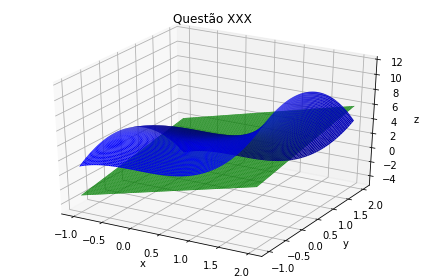

In [ ]:
f1 = lambda x, y: 2*x + y
f2 = lambda x, y: x**3 - 2*y**2 + 4
f = [f1, f2]
plota_3d(-1, 2, 100, f, "surface")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


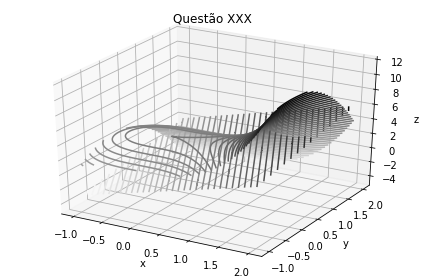

In [ ]:
plota_3d(-1, 2, 100, f, "contour")

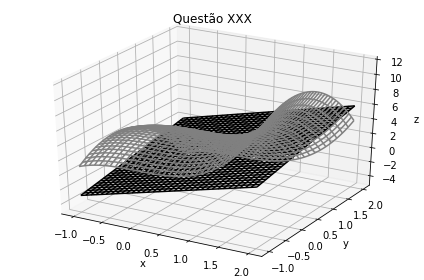

In [ ]:
plota_3d(-1, 2, 100, f, "wireframe")

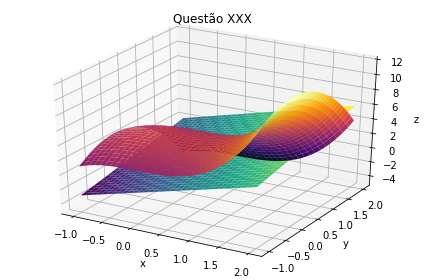

In [ ]:
plota_3d(-1, 2, 100, f, "surface_cmap")

In [ ]:
def plota_2d(inicio, fim, n_ptos, f, color='green',title='Questão XXX', linewidth=1):

  # Retorna 'n_ptos' valores igualmente espaçados entre o 'inicio' e o 'fim'
  # no caso serão os nossos valores de 'x'
  curva = np.linspace(inicio, fim, n_ptos)

  # Com os valores de 'x'(colocados na variavel 'curva') fazemos um for para 
  # passar todos eles na nossa função 'f(x)' e pegar os valores de 'y'(colocados
  # na variavel 'valores')
  valores = [f(x) for x in curva]

  # Mandamos os valores de 'x' e 'y' para plotar no gráfico
  plt.plot(curva, valores, linestyle='-', linewidth=linewidth, color=color, label='F(X)')
  plt.plot([inicio, fim], [0, 0], color='black', linewidth=2)

  # E temos varias customizações que podemos fazer
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(title)
  plt.grid()

  plt.show()

### Funções auxiliares para truncar ou arredondar floats a uma certa precisão

In [ ]:
def truncate(number, decimals):
  factor = int(1 / decimals)
  trunc = math.trunc(number * factor)
  return (trunc / factor)

In [ ]:
def round_epsilon(number, precision):
  n_digits = int(1/precision)
  epsilon = math.log(n_digits, 10)
  return round(number, int(epsilon))

In [ ]:
def round_epsilon_array(number, precision):
  n_digits = int(1/precision)
  epsilon = math.log(n_digits, 10)
  return np.round(number, int(epsilon))

### Função auxiliar para retro substituição

In [ ]:
def retro_substituicao(matriz, b, n, triangular="superior", precisao=None):

  results = np.array([1] * n, dtype=np.float64)

  if triangular == "superior":
    if precisao is not None:
      for i in range( n-1, -1, -1 ):
        sum_of_line = round_epsilon(np.sum(matriz[i][i+1:n] * results[i+1:n], dtype=np.float64), precisao)
        results[i] = round_epsilon((b[i] - sum_of_line) / matriz[i][i], precisao)
      return results
    else:
      for i in range( n-1, -1, -1 ):
        sum_of_line = np.sum(matriz[i][i+1:n] * results[i+1:n], dtype=np.float64)
        results[i] = (b[i] - sum_of_line) / matriz[i][i]
      return results

  else: # inferior
    if precisao is not None:
      for i in range( 0, n, 1 ):
        sum_of_line = round_epsilon(np.sum(matriz[i][0:i] * results[0:i], dtype=np.float64), precisao)
        results[i] = round_epsilon((b[i] - sum_of_line) / matriz[i][i], precisao)
      return results
    else:
      for i in range( 0, n, 1 ):
        sum_of_line = np.sum(matriz[i][0:i] * results[0:i], dtype=np.float64)
        results[i] = (b[i] - sum_of_line) / matriz[i][i]
      return results

### Classe auxiliar para representação de máquinas

In [ ]:
class Maquina:
  def __init__(self, mantissa, base, menor_expoente, maior_expoente):
    self.mantissa = mantissa
    self.base = mantissa
    self.menor_expoente = menor_expoente
    self.maior_expoente = maior_expoente

# **Métodos**

## Fatoração LU

In [ ]:
def fatoracao_LU(matriz, b, n, pivotamento = "nenhum", precisao=None):
  # Escalonamento

  # Cria as matrizes 
                  
  # L (lower, com os multiplicadores de cada linha) 
  L = np.array([[0] * n] * n, dtype=np.float64)
  
  for d in range(0, n, 1):
    L[d][d] = 1
  
  # U (upper, com a matriz triangular inferior zerada, igual com a eliminação de gauss)
  # U = np.array([[0] * n] * n, dtype=np.float64) ou U = matriz
  
  # Vai em todas colunas
  for j in range(0, n):

    # Seleciona pivo
    pivo = matriz[j][j]
    # print("pivo == ", pivo)
    # Swap com a próxima linha até pivo != 0
    index_pivo = j + 1
    while pivo == 0:
      # print("pivo == 0, swapping rows")
      matriz[[j, index_pivo]] = matriz[[index_pivo, j]]
      # print("Matrix swapped\n", matriz)
      pivo = matriz[j][j]
      # print("new pivo = ", pivo)
      index_pivo += 1
      if index_pivo > n:
        print("Invalid matriz...")
        return

    # ==========================================================================
    # Constroi linha L'
    # Vai da linha j até a ultima

    if precisao is not None:
      for i in range(j+1, n):
        # Multiplicador da linha i
        m = round_epsilon(matriz[i][j] / pivo, precisao)
        L[i][j] = m
        # Linha L'i
        matriz[i] = round_epsilon_array(matriz[i] - m * matriz[j], precisao)
    else:
      for i in range(j+1, n):
        # Multiplicador da linha i
        m = matriz[i][j] / pivo
        L[i][j] = m
        # Linha L'i
        matriz[i] = matriz[i] - m * matriz[j]

  U = matriz
# Retro Substituição

  # { U * x = y  
  # { L * y = b
  y = retro_substituicao(L, b, n, "inferior", precisao)
  x = retro_substituicao(U, y, n, "superior", precisao)

  return (matriz, x)

## Eliminação de Gauss

In [ ]:
def gauss_elimination(matriz, n, pivotamento="nenhum"):

# Escalonamento

  # Vai em todas colunas
  for j in range(0, n):

    # ==========================================================================
    # PIVOTAMENTO TOTAL
    # ==========================================================================
    if pivotamento == "total":
      # Seleciona como pivo o maior elementro da matriz
      maior_elemento = matriz[j][j]
      i_maior_elemento, j_maior_elemento = j, j

      # Vai procurar em toda matriz para encontrar o amior elemento
      for i in range(j, n, 1):
        for j_index in range(j, n, 1):
          if math.fabs(matriz[i][j_index]) > math.fabs(maior_elemento):
            i_maior_elemento, j_maior_elemento = i, j_index
            maior_elemento = matriz[i][j_index]

      # Swap rows
      matriz[[j, i_maior_elemento]] = matriz[[i_maior_elemento, j]]
      # Swap collums
      matriz[: , [j, j_maior_elemento]] = matriz[: , [j_maior_elemento, j]]

      pivo = matriz[j][j]
      if pivo == 0:
        print("Invalid matriz, collum j == 0...")
        return

    # ==========================================================================
    # PIVOTAMENTO PARCIAL
    # ==========================================================================
    elif pivotamento == "parcial":
      # Seleciona como pivo o maior elementro da coluna j
      # print("Matriz: \n", matriz)
      maior_elemento = matriz[j][j]
      for i in range(j+1, n, 1):
        # print("Maior elemento: ", maior_elemento)
        # print("Matriz[i][j]: ", matriz[i][j])
        if  math.fabs(matriz[i][j]) > math.fabs(maior_elemento):
          # Swap linha com maior elemento
          matriz[[i, j]] = matriz[[j, i]]
          # print("Matriz swapped: \n", matriz)
          maior_elemento = matriz[j][j]
    
      pivo = matriz[j][j]
      # print("Pivo: ", pivo)
      if pivo == 0:
        print("Invalid matriz, collum j == 0...")
        return

    # ==========================================================================
    # SEM PIVOTAMENTO
    # ==========================================================================
    elif pivotamento == "nenhum":
      # Seleciona pivo
      pivo = matriz[j][j]
      # print("pivo == ", pivo)
      # Swap com a próxima linha até pivo != 0
      index_pivo = j + 1
      while pivo == 0:
        # print("pivo == 0, swapping rows")
        matriz[[j, index_pivo]] = matriz[[index_pivo, j]]
        # print("Matrix swapped\n", matriz)
        pivo = matriz[j][j]
        # print("new pivo = ", pivo)
        index_pivo += 1
        if index_pivo > n:
          print("Invalid matriz...")
          return

    # pivotamento errado
    else:
      print("invalid pivotamento...")
      return

    # ==========================================================================
    # Constroi linha L'
    # Vai da linha j até a ultima
    for i in range(j+1, n):
      # Multiplicador da linha i
      m = matriz[i][j] / pivo
      # Linha L'i
      matriz[i] = matriz[i] - m * matriz[j]


# Retro Substituição

  # Pega b (os resultados)
  # fazendo a transposta da matriz
  b = matriz.T[n]

  # Retira a ultima coluna dos resultados
  matriz = matriz[0:n+1][0:n]

  # Cria o array (de tamanho n) que sera armazenado os resultados
  results = np.array([1] * n, dtype=np.float64)

  # Vai da ultima inha até a primeira
  for i in range( n-1, -1, -1 ):
      sum_of_line = np.sum(matriz[i][i+1:n] * results[i+1:n], dtype=np.float64)
      results[i] = (b[i] - sum_of_line) / matriz[i][i]

  return (matriz, results)

## Gauss - Jacobi

In [ ]:
def gauss_jacobi(A, b, n, epsilon):
  # I = np.tril(A, -1) # Triangular inferior com diagonal nula
  # S = np.triu(A, 1) # Triangular superior com diagonal nula
  # D = np.diag(np.diag(A)) # Diagonal principal

  x = [] # Lista com todas iterações
  xn = [] # Resultado da iteração atual
  converged = false
  iteration = 0 # Numero de iterações feitas


  # 1º Chute assumindo xi = bi / aii
  for i in range(n):
    xn.append(b[i] / A[i][i])

  x.append(xn)
  xn = []


  while not converged:
    # Isola o Xi e calcula a aproximação 
    for i in range(n):
      linha = 0
      # Calcula a linha
      for j in range(n):
        if j != i:
          linha -= (A[i][j] * x[iteration][j])

      xn.append( (1 / A[i][i]) * (b[i] + linha))

    x.append(xn)
    xn = []

    iteration += 1


    # Verifica o criterio de parada
    d = [math.fabs(x - y) for x, y in zip(x[-1], x[-2])]
    x_abs = [math.fabs(x) for x in x[-1]]

    actual_precision = max(d) / max(x_abs)

    if actual_precision < epsilon:
      converged = true
      
  print("Levou: ", iteration, " iterações.")
  return x[-1]

## Gauss - Seidel

In [ ]:
def gauss_seidel(A, b, n, epsilon):
  # I = np.tril(A, -1) # Triangular inferior com diagonal nula
  # S = np.triu(A, 1) # Triangular superior com diagonal nula
  # D = np.diag(np.diag(A)) # Diagonal principal

  x = [] # Lista com todas iterações
  xn = [] # Resultado da iteração atual
  converged = false
  iteration = 0 # Numero de iterações feitas


  # 1º Chute assumindo xi = bi / aii
  for i in range(n):
    xn.append(b[i] / A[i][i])

  x.append(xn)
  xn = []


  while not converged:
    # Isola o Xi e calcula a aproximação 
    for i in range(n):
      linha = 0
      # Calcula a linha
      for j in range(n):
        if j != i:
          # Agora com o método de seidel pega os X já atualizados
          if j < i:
            linha -= (A[i][j] * xn[j])
          else:
            linha -= (A[i][j] * x[iteration][j])

      xn.append( (1 / A[i][i]) * (b[i] + linha))

    x.append(xn)
    xn = []

    iteration += 1


    # Verifica o criterio de parada
    d = [math.fabs(x - y) for x, y in zip(x[-1], x[-2])]
    x_abs = [math.fabs(x) for x in x[-1]]

    actual_precision = max(d) / max(x_abs)

    if actual_precision < epsilon:
      converged = true

  print("Levou: ", iteration, " iterações.")
  return x[-1]

# Relatório 2

##Questão 1
 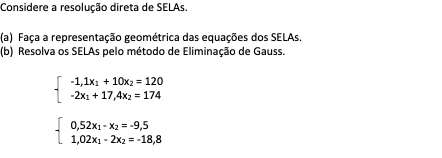

In [ ]:
f1 = lambda x, y: -1.1*x + 10*y - 120
f2 = lambda x, y: -2*x + 17.4*y -174
f3 = lambda x, y: 120

f = [f1, f2]

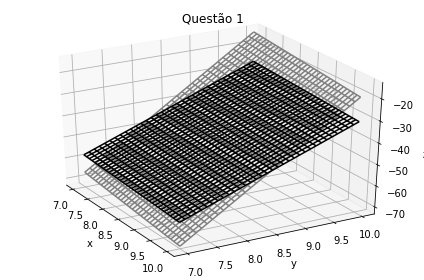

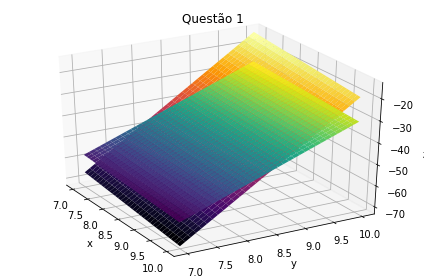

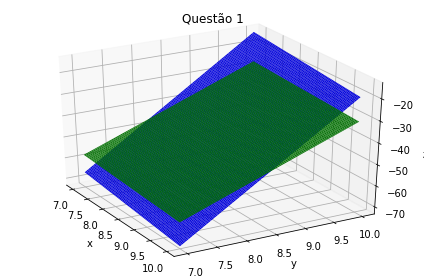

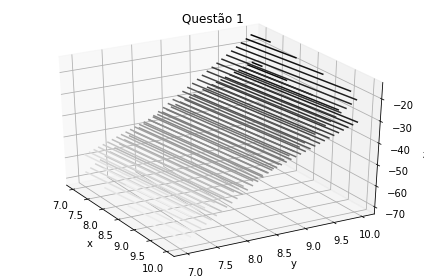

In [ ]:
plota_3d_all(7, 10, 100, f, view_point=(30, -30), title="Questão 1")

In [ ]:
eq1 = [-1.1, 10, 120]
eq2 = [-2, 17.4, 174]

matriz = np.array([eq1, eq2])

matriz, resultado = gauss_elimination(matriz, 2, "parcial")
print("Matriz resultante: \n", matriz)
print("Resultados c/ pivotamento parcial: \n", resultado)

Matriz resultante: 
 [[ -2.    17.4  174.  ]
 [  0.     0.43  24.3 ]]
Resultados c/ pivotamento parcial: 
 [404.65116279  56.51162791]


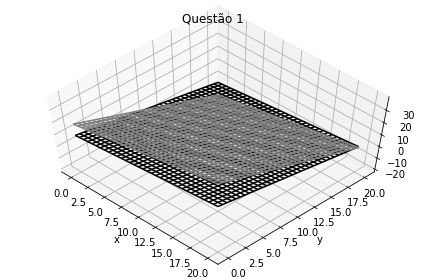

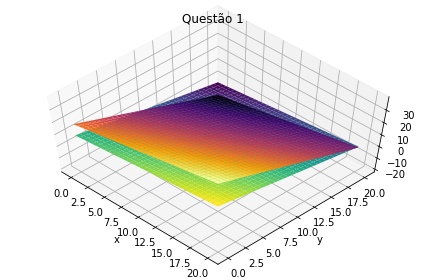

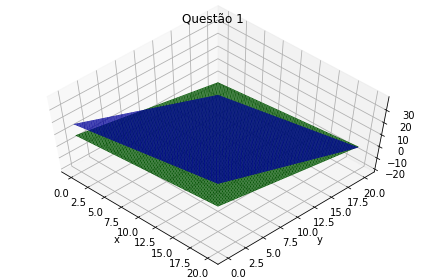

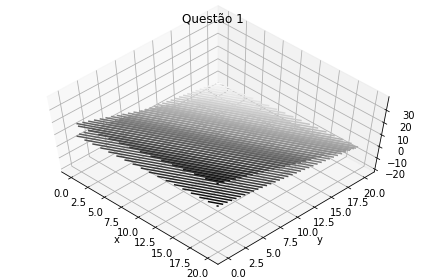

In [ ]:
f1 = lambda x, y: 0.52*x - 1*y + 9.5
f2 = lambda x, y: 1.02*x - 2*y + 18.8

f = [f1, f2]
plota_3d_all(0, 20, 100, f, view_point=(60, -45), title="Questão 1")

In [ ]:
eq1 = [0.52, -1, -9.5]
eq2 = [1.02, -2, -18.8]

matriz = np.array([eq1, eq2])

matriz, resultado = gauss_elimination(matriz, 2, "parcial")
print("Matriz resultante: \n", matriz)
print("Resultados c/ pivotamento parcial: \n", resultado)

Matriz resultante: 
 [[  1.02        -2.         -18.8       ]
 [  0.           0.01960784   0.08431373]]
Resultados c/ pivotamento parcial: 
 [-10.    4.3]


##Questão 2
 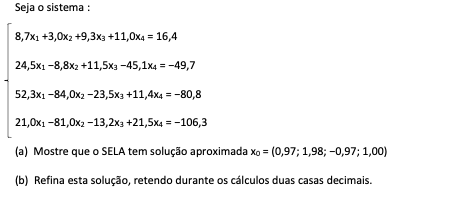

In [ ]:
eq1 = [8.7, 3, 9.3, 11]
eq2 = [24.5, -8.8, 11.5, -45.1]
eq3 = [52.3, -84., -23.5, 11.4]
eq4 = [21., -81., -13.2, 21.5]

b = np.array([16.4, -49.7, -80.8, -106.3])

A = np.array([eq1, eq2, eq3, eq4])

In [ ]:
fatoracao_LU(A, b, 4, "nenhum")

(array([[    8.7       ,     3.        ,     9.3       ,    11.        ],
        [    0.        ,   -17.24827586,   -14.68965517,   -76.07701149],
        [    0.        ,     0.        ,     7.49172331,   395.31729975],
        [    0.        ,     0.        ,     0.        , -1700.32497652]]),
 array([ 1.,  2., -1.,  1.]))

In [ ]:
A = np.array([eq1, eq2, eq3, eq4])
fatoracao_LU(A, b, 4, "nenhum", 0.01)

(array([[ 8.70000e+00,  3.00000e+00,  9.30000e+00,  1.10000e+01],
        [-3.00000e-02, -1.72600e+01, -1.47300e+01, -7.61200e+01],
        [ 1.90000e-01, -2.00000e-02,  7.66000e+00,  3.95160e+02],
        [-8.00000e-01,  7.00000e-02, -2.00000e-02, -1.66297e+03]]),
 array([ 0.97,  1.98, -0.97,  1.  ]))

## Questão 3
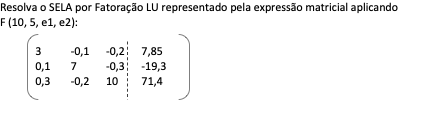

In [ ]:
eq1 = [3, -0.1, -0.2]
eq2 = [0.1, 7, -0.3]
eq3 = [0.3, -0.2, 10]

b = [7.85, -19.3, 71.4]

matriz = np.array([eq1, eq2, eq3])

fatoracao_LU(matriz, b, 3, "parcial", 0.0001)

(array([[ 3.00000e+00, -1.00000e-01, -2.00000e-01],
        [ 1.00000e-04,  7.00330e+00, -2.93300e-01],
        [ 0.00000e+00, -2.00000e-04,  1.00121e+01]]),
 array([ 3. , -2.5,  7. ]))

##Questão 4
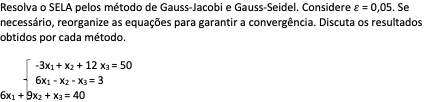

In [ ]:
eq2 = [6., -1., -1.]
eq3 = [6., 9., 1.]
eq1 = [-3., 1., 12.]

A = np.array([eq2, eq3, eq1])

b = np.array([50., 3., 40.])

In [ ]:
gauss_jacobi(A, b, 3, 0.05)

Levou:  3  iterações.


[8.301183127572017, -5.87019890260631, 5.927211934156379]

In [ ]:
gauss_seidel(A, b, 3, 0.05)

Levou:  3  iterações.


[8.33454432441701, -5.879872542295382, 5.9069587929622]

### Discussão da questão 4

  Ambos métodos levam o mesmo numero de iterações para chegar na precisão desejada, mas o método de **Gauss-Seidel** se aproxima mais do resultado real, como era de se esperar, já que o método de **Gauss-Seidel** é uma melhoria do **Gauss-Jacobi**.
  Para conseguir que converja é necessário reorganizar as equações.